In [1]:
%matplotlib inline
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina'
 # autoreload workflow, reload modules every time cell is run
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10,8 # have to fix figure size due to backend
from astropy.io import ascii   
from scipy.special import erf

In [3]:
# default_names = ['i', 'x1v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Er', 
#                  'Fr1', 'Fr2', 'Fr3', 'Pr', 'Er0', 'Fr01', 'Fr02', 'Fr03', 
#                  'Sigma_s', 'Sigma_a', 'Sigma_p']
# dummies = ['dum%d' % i for i in range(27-len(default_names))]

In [4]:
default_names = ['i', 'x1v', 'rho', 'Pres', 'vel1', 'vel2', 'vel3']
dummies = []

In [29]:
import yt

# Load the dataset.
ds = yt.load("SN.out1.00001.athdf")

yt : [WARNING  ] 2018-03-10 03:18:49,901 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2018-03-10 03:18:49,903 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2018-03-10 03:18:49,904 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2018-03-10 03:18:49,905 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2018-03-10 03:18:49,920 Parameters: current_time              = 101450.361799
yt : [INFO     ] 2018-03-10 03:18:49,921 Parameters: domain_dimensions         = [256   4   4]
yt : [INFO     ] 2018-03-10 03:18:49,922 Parameters: domain_left_edge          = [  2.20000000e+13   0.00000000e+00   0.00000000e+00]
yt : [INFO     ] 2018-03-10 03:18:49,923 Parameters: domain_right_edge         = [  6.00000000e+13   3.14159265e+00   6.28318531e+00]
yt : [INFO     ] 2018-03-10 03:18:49,924 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2018-03-10 03:18:55,367 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2018-03-10 03:18:55,556 xlim = 11000000000000.000000 71000000000000.000000
yt : [INFO     ] 2018-03-10 03:18:55,557 ylim = -38000000000000.000000 38000000000000.000000
yt : [INFO     ] 2018-03-10 03:18:55,560 xlim = 11000000000000.000000 71000000000000.000000
yt : [INFO     ] 2018-03-10 03:18:55,561 ylim = -38000000000000.000000 38000000000000.000000
yt : [INFO     ] 2018-03-10 03:18:55,562 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800



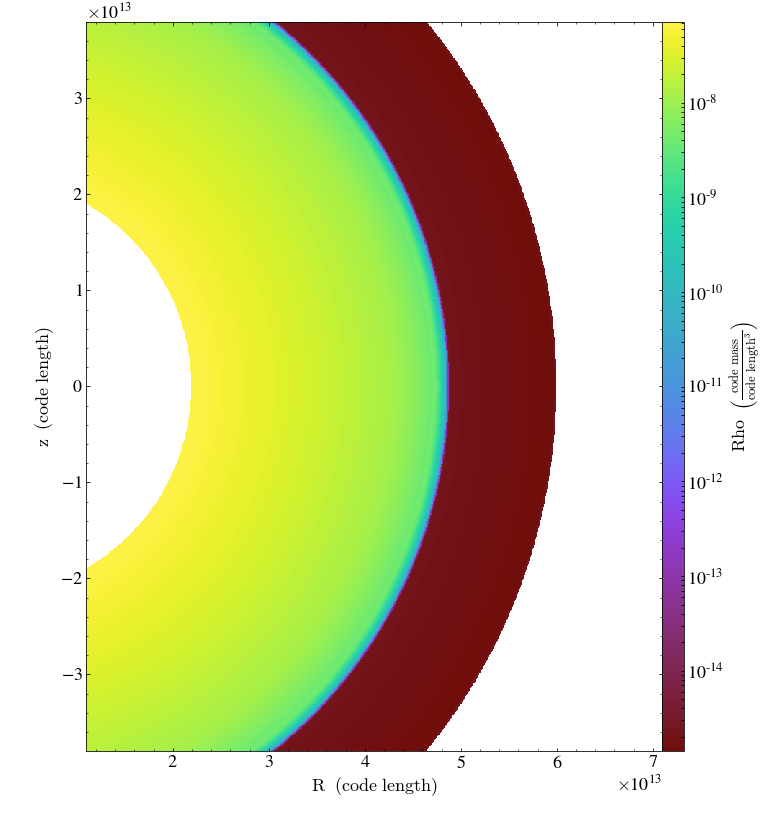

In [30]:
slc = yt.SlicePlot(ds, 'phi', 'rho', center=[0.0, 0.0, 0.0])
slc.show()

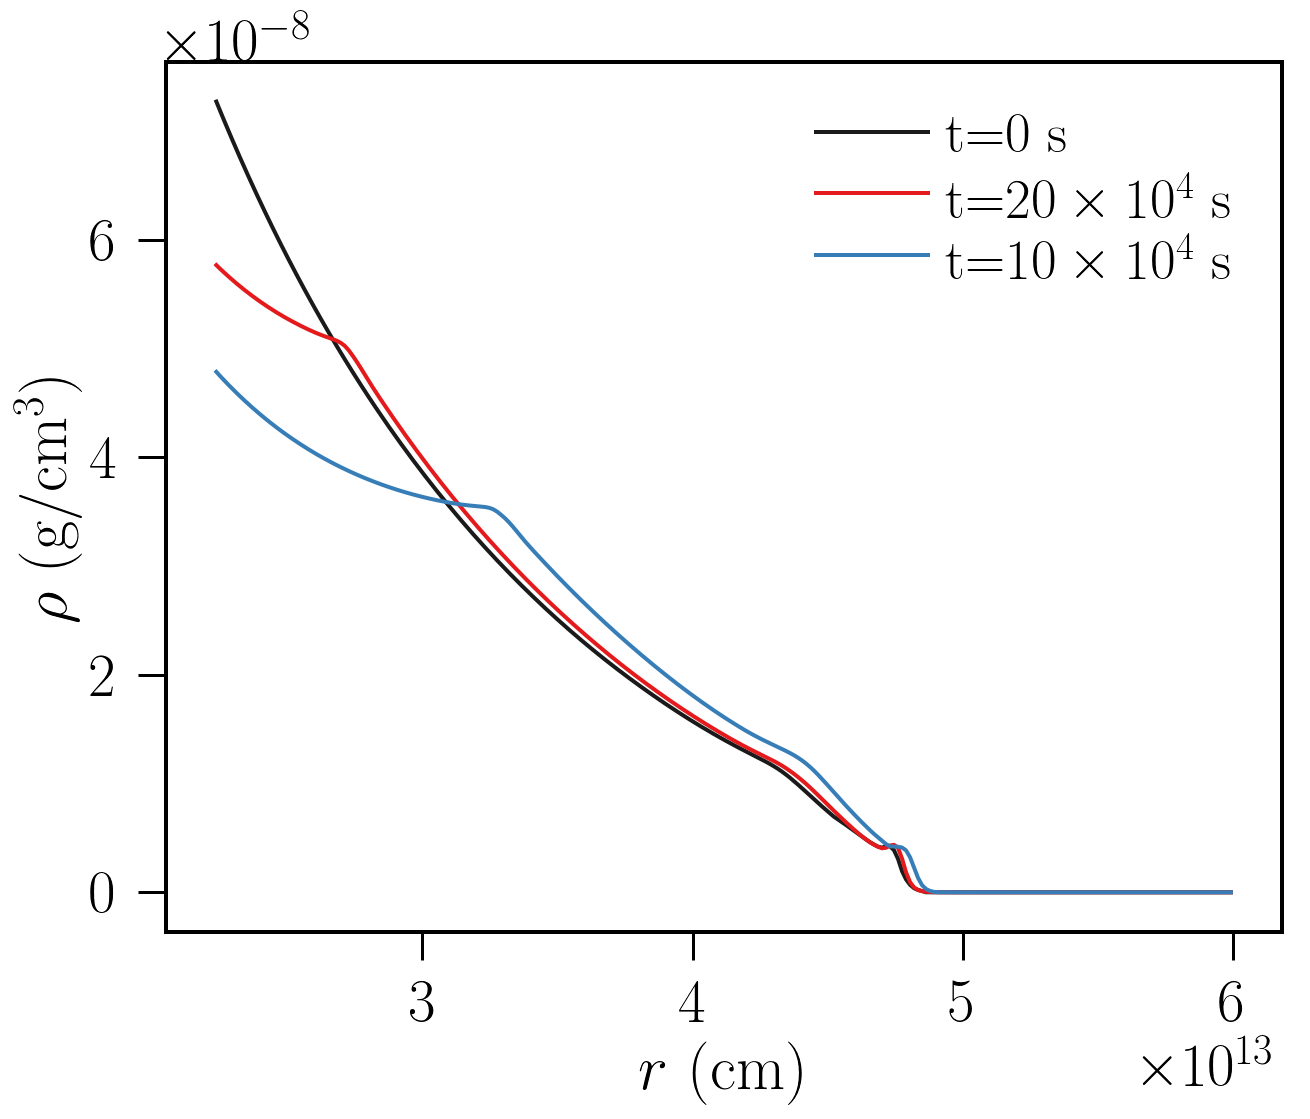

In [5]:
data1 = ascii.read("./SN.block0.out1.00000.tab",
                   format='no_header', data_start=2,
                  names= default_names+dummies)  
data2 = ascii.read("./SN.block0.out1.00010.tab", 
                   format='no_header', data_start=2,
                  names= default_names+dummies)
data3 = ascii.read("./SN.block0.out1.00020.tab", 
                   format='no_header', data_start=2,
                  names= default_names+dummies)

# data1.colnames
plt.plot( data1['x1v'], data1['rho'], label='t=0 s' )
plt.plot( data2['x1v'], data2['rho'], label=r't=$20 \times 10^4$ s' )
plt.plot( data3['x1v'], data3['rho'], label=r't=$10 \times 10^4$ s' )


plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.xlabel(r'$r$ (cm)')
plt.legend()
# plt.yscale('log')

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

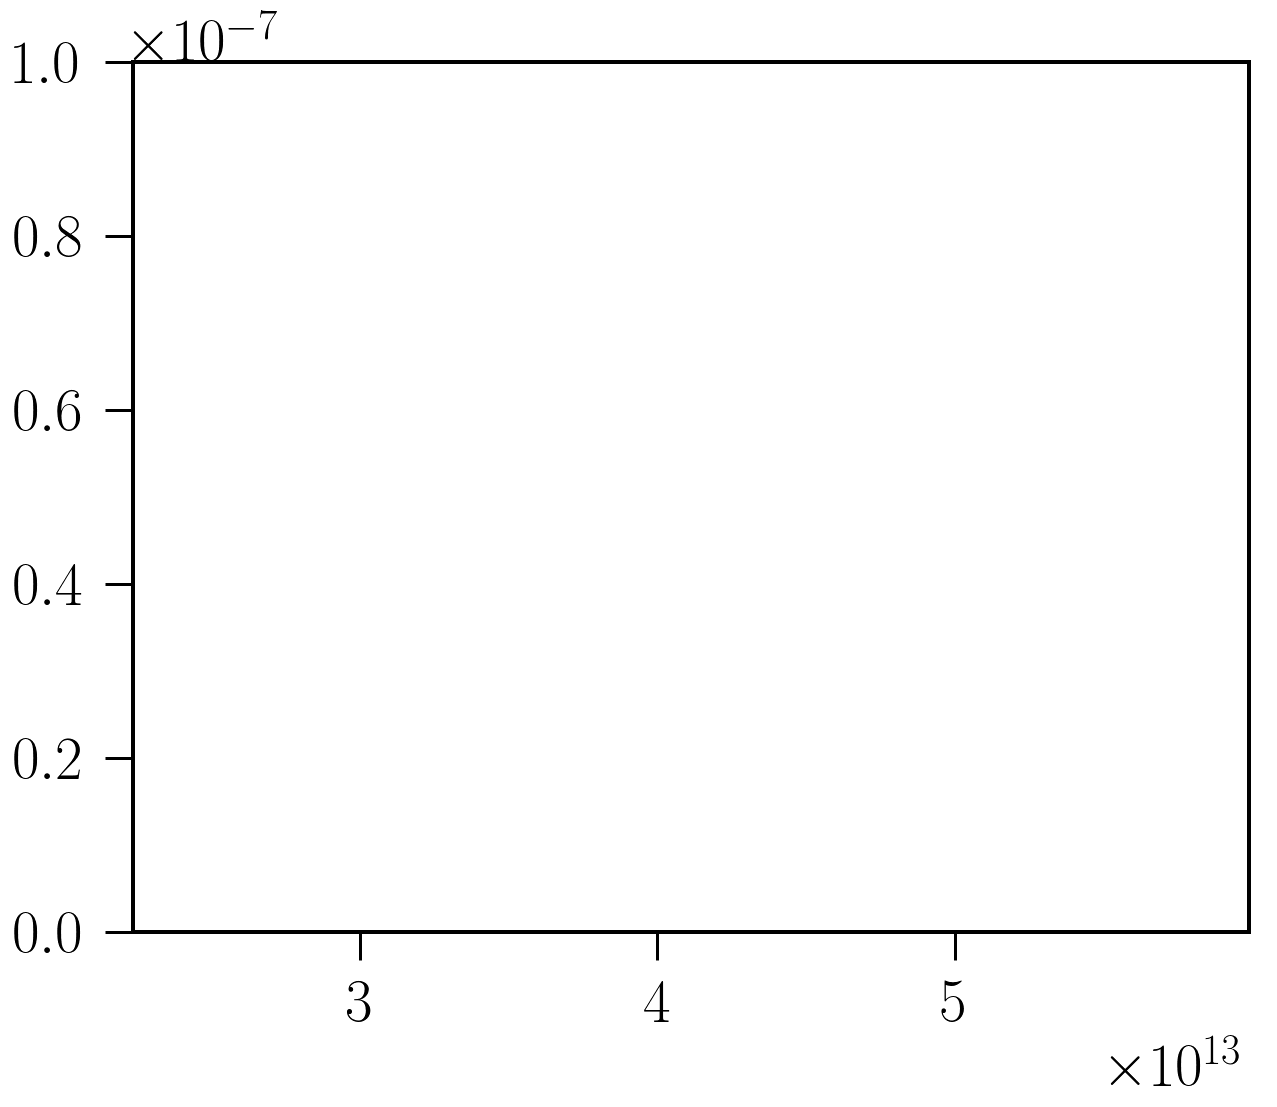

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( np.min(data1['x1v']), np.max(data1['x1v'])))
ax.set_ylim((1e-15,1e-7))
# ax.set_yscale('log')

line, = ax.plot([], [], lw=2)

In [30]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [31]:
# animation function. This is called sequentially
def animate(i):
    datai = ascii.read('./SN.block0.out1.' + str(i).zfill(5) + '.tab',
                   format='no_header', data_start=2,
                  names= default_names+dummies)  
    line.set_data(datai['x1v'], datai['rho'])
    return (line,)

In [42]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)
HTML(anim.to_html5_video())